# My MobApp Studio Project

The objective of this notebook is to research on app market in Google Play Store. Questions that this report will focus on are as follows:
- What is the size of the market? numbers of download and $
- Same question but per category? (percentages please)
- Depending on each category, what are the ratio of download per app?
- and others

## 1. Analyzing Data

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("googleplaystore.csv")
print(df.columns.values)
print("-" * 80)
print(df.head())
print("-" * 40)
print(df.info())

['App' 'Category' 'Rating' 'Reviews' 'Size' 'Installs' 'Type' 'Price'
 'Content Rating' 'Genres' 'Last Updated' 'Current Ver' 'Android Ver']
--------------------------------------------------------------------------------
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4 

## 2. Data Cleaning
- shift 10472nd row to the right
- set category of 10472nd row to "LIFESTYLE" 
- remove "+" and "," signs in Installs column
- change Installs column to int type
- remove "$" sign in Price column
- change Price column to float type

In [4]:
df.loc[10472, :] = df.loc[10472, :].shift(1) 
df.iloc[10472,0] = df.iloc[10472,1]
df.iloc[10472,1] = 'LIFESTYLE'

df.Installs = df.loc[:, 'Installs'].map(lambda x: x.rstrip('+'))
df.Installs = df['Installs'].replace(',','', regex=True)
df.Installs = df['Installs'].astype(int)

df.Price = df.loc[:, 'Price'].map(lambda x: x.lstrip('$'))
df.Price = df['Price'].astype(float)

#print(df['Rating'].info())
df.Rating = df.Rating.astype(float)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null int64
Type              10840 non-null object
Price             10841 non-null float64
Content Rating    10841 non-null object
Genres            10840 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB
None


## 3. Market size (Total number of downloads and money spent)

In [194]:
total_downloads = df.Installs.sum()
print('Total number of downloads of all applications: ' + str(total_downloads) + '+')

Total number of downloads of all applications: 167633434487+


In [195]:
df['Total_money'] = df['Installs'] * df['Price']
print('Total money spent for all paid applications: $' + str(df.Total_money.sum()))

Total money spent for all paid applications: $388629445.79


### 3.1. Market size per category

"Game" and "communication" apps have the highest number of installs, and owns 20.93% and 19.48% among all categories, respectively.

Apps in "Family" category have the highest income from the users by downloading those apps. They have 47.87% of all app incomes from downloading them. The next categories with high incomes are "Lifestyle" and "Game", which own 14.82% and 10.55%, respectively. 

Percentages of number of installs by category
Category
ART_AND_DESIGN          0.074173
AUTO_AND_VEHICLES       0.031694
BEAUTY                  0.016224
BOOKS_AND_REFERENCE     1.146233
BUSINESS                0.597682
COMICS                  0.033458
COMMUNICATION          19.475397
DATING                  0.157672
EDUCATION               0.519856
ENTERTAINMENT           1.711568
EVENTS                  0.009529
FAMILY                  6.119462
FINANCE                 0.522956
FOOD_AND_DRINK          0.163391
GAME                   20.930207
HEALTH_AND_FITNESS      0.944366
HOUSE_AND_HOME          0.100644
LIBRARIES_AND_DEMO      0.037580
LIFESTYLE               0.320726
MAPS_AND_NAVIGATION     0.432063
MEDICAL                 0.031770
NEWS_AND_MAGAZINES      4.471851
PARENTING               0.018804
PERSONALIZATION         1.387250
PHOTOGRAPHY             6.018040
PRODUCTIVITY            8.456601
SHOPPING                1.937471
SOCIAL                  8.393235
SPORTS               

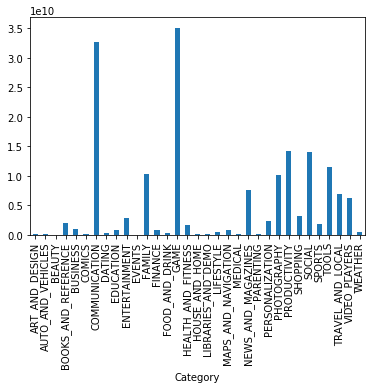

In [196]:
print('Percentages of number of installs by category')
df_install_percent = df.groupby(['Category'])['Installs'].sum()
print(df_install_percent/total_downloads * 100)
ax = df_install_percent.plot.bar() #(x='lab', y='val', rot=0)

Percentages of number of total money spent on apps by category
Category
ART_AND_DESIGN          0.008193
AUTO_AND_VEHICLES       0.025770
BEAUTY                  0.000000
BOOKS_AND_REFERENCE     0.023217
BUSINESS                0.527120
COMICS                  0.000000
COMMUNICATION           1.092909
DATING                  0.022737
EDUCATION               0.618579
ENTERTAINMENT           0.205337
EVENTS                  0.000028
FAMILY                 47.874042
FINANCE                 6.619848
FOOD_AND_DRINK          0.073180
GAME                   10.546714
HEALTH_AND_FITNESS      0.443885
HOUSE_AND_HOME          0.000000
LIBRARIES_AND_DEMO      0.000025
LIFESTYLE              14.817184
MAPS_AND_NAVIGATION     0.319273
MEDICAL                 3.493004
NEWS_AND_MAGAZINES      0.001658
PARENTING               0.064318
PERSONALIZATION         2.644408
PHOTOGRAPHY             5.383732
PRODUCTIVITY            1.109894
SHOPPING                0.007758
SOCIAL                  0.001528
SPOR

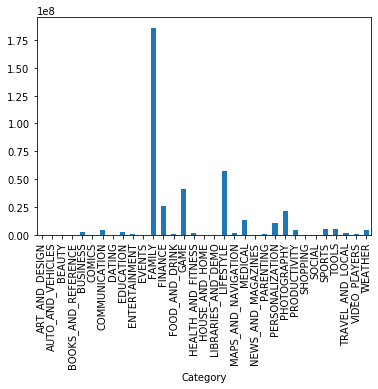

In [197]:
df_money_percent = df.groupby(['Category'])['Total_money'].sum()
print('Percentages of number of total money spent on apps by category')
print(df_money_percent/df.Total_money.sum() * 100)
df_money_percent.plot.bar()

### 3.2. Ratio of downloads of apps by categories

*Ratio of downloads of apps by categories are shown below:*

In [198]:
for category in df_install_percent.index:
    df_ratio_app_by_cat = pd.DataFrame(columns = ['App', 'Installs'])
    df_ratio_app_by_cat = df[df['Category'] == category][['App', 'Installs']]
    df_ratio_app_by_cat['Install_ratio'] = df_ratio_app_by_cat['Installs'] / df_ratio_app_by_cat['Installs'].sum() * 100
    print('Percentages of number of Installs of apps in category ' + str(category))
    print(df_ratio_app_by_cat[['App','Install_ratio']])

Percentages of number of Installs of apps in category ART_AND_DESIGN
                                                    App  Install_ratio
0        Photo Editor & Candy Camera & Grid & ScrapBook       0.008043
1                                   Coloring book moana       0.402129
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       4.021294
3                                 Sketch - Draw & Paint      40.212936
4                 Pixel Draw - Number Art Coloring Book       0.080426
5                            Paper flowers instructions       0.040213
6               Smoke Effect Photo Maker - Smoke Editor       0.040213
7                                      Infinite Painter       0.804259
8                                  Garden Coloring Book       0.804259
9                         Kids Paint Free - Drawing Fun       0.008043
10                              Text on Photo - Fonteee       0.804259
11              Name Art Photo Editor - Focus n Filters       0.804259
12      

[231 rows x 2 columns]
Percentages of number of Installs of apps in category BUSINESS
                                                     App  Install_ratio
187                         Visual Voicemail by MetroPCS   9.980888e-01
188                                    Indeed Job Search   4.990444e+00
189                                          Uber Driver   9.980888e-01
190                                 ADP Mobile Solutions   4.990444e-01
191                               Snag - Jobs Hiring Now   9.980888e-02
192                        Docs To Go™ Free Office Suite   4.990444e+00
193                                   Google My Business   4.990444e-01
194               OfficeSuite : Free Office + PDF Editor   9.980888e+00
195                                         USPS MOBILE®   9.980888e-02
196                           Job Search by ZipRecruiter   9.980888e-02
197    Curriculum vitae App CV Builder Free Resume Maker   4.990444e-02
198                                        Google 

Percentages of number of Installs of apps in category COMMUNICATION
                                                    App  Install_ratio
335            Messenger – Text and Video Chat for Free   3.063043e+00
336                                  WhatsApp Messenger   3.063043e+00
337                                   Messenger for SMS   3.063043e-02
338                        Google Chrome: Fast & Secure   3.063043e+00
339               Messenger Lite: Free Calls & Messages   3.063043e-01
340                                               Gmail   3.063043e+00
341                                            Hangouts   3.063043e+00
342                                     Viber Messenger   1.531521e+00
343                                            My Tele2   1.531521e-02
344                      Firefox Browser fast & private   3.063043e-01
345                         Yahoo Mail – Stay Organized   3.063043e-01
346                        imo beta free calls and text   3.063043e-01
347      

Percentages of number of Installs of apps in category EVENTS
                                                     App  Install_ratio
1004                                  All Events in City       0.626050
1005                          Ticketmaster Event Tickets      31.302508
1006                                            Reminder       3.130251
1007                         Birdays - Birthday reminder       0.313025
1008      StubHub - Tickets to Sports, Concerts & Events      31.302508
1009                                               Fever       6.260502
1010                     DroidAdmin for Android - Advice       0.062605
1011    SeatGeek – Tickets to Sports, Concerts, Broadway       6.260502
1012                                                my4D       0.626050
1013                 VAN NIAN 2018 - Vietnamese Calendar       0.062605
1014                         Vivid Seats – Event Tickets       6.260502
1015                                           Name days       0.626050
101

Percentages of number of Installs of apps in category GAME
                                                     App  Install_ratio
1653                                              ROBLOX   2.850138e-01
1654                                      Subway Surfers   2.850138e+00
1655                                    Candy Crush Saga   1.425069e+00
1656                                           Solitaire   2.850138e-02
1657                                      Bubble Shooter   2.850138e-02
1658                              Hello Kitty Nail Salon   1.425069e-01
1659                                          slither.io   2.850138e-01
1660                                        Clash Royale   2.850138e-01
1661                                        Temple Run 2   1.425069e+00
1662                                                 Pou   1.425069e+00
1663                                          Helix Jump   2.850138e-01
1664                                        Block Puzzle   1.425069e-02
1665 

Percentages of number of Installs of apps in category LIFESTYLE
                                                     App  Install_ratio
1562                          Dollhouse Decorating Games       0.929982
1563                                           metroZONE       1.859965
1564                              Easy Hair Style Design       0.018600
1565                      Talking Babsy Baby: Baby Games       1.859965
1566   Black Wallpaper, AMOLED, Dark Background: Darkify       0.929982
1567                        Girly Wallpapers Backgrounds       0.185996
1568                            Chart - Myanmar Keyboard       0.929982
1569                               Easy Makeup Tutorials       0.185996
1570   Horoscopes – Daily Zodiac Horoscope and Astrology       1.859965
1571                                               Entel       0.185996
1572                                     ZenUI Safeguard       0.185996
1573                         Live 4D Results ! (MY & SG)       0.929982


Percentages of number of Installs of apps in category PARENTING
                                                    App  Install_ratio
3575                                         Baby Names       0.031725
3576                                      My baby Piano      15.862386
3577                   Zoo For Preschool Kids 3-9 Years       0.031725
3578                        My baby Game (Balloon POP!)       3.172477
3579                                   Arabic Alphabets       0.031725
3580                        Learn the letters and words       0.031725
3581              Development of the child up to a year       0.317248
3582                          Favorite children's songs       0.031725
3583                Ali Baba's Farm Tutorial Kids Games       0.015862
3584                           Baby Panda Learns Shapes       3.172477
3585                      Learning English for children       0.158624
3586                                  Mozart Baby Sleep       0.158624
3587         

Percentages of number of Installs of apps in category SHOPPING
                                                     App  Install_ratio
2654                                  Amazon for Tablets   3.078961e-01
2655                            Wish - Shopping Made Fun   3.078961e+00
2656                       OfferUp - Buy. Sell. Offer Up   3.078961e-01
2657                      Shopee - No. 1 Online Shopping   3.078961e-01
2658                        Shopee: No.1 Online Shopping   3.078961e-01
2659                                              Kroger   1.539481e-01
2660        AliExpress - Smarter Shopping, Better Living   3.078961e+00
2661                                             Walmart   3.078961e-01
2662   eBay: Buy & Sell this Summer - Discover Deals ...   3.078961e+00
2663    letgo: Buy & Sell Used Stuff, Cars & Real Estate   1.539481e+00
2664                                     Amazon Shopping   3.078961e+00
2665                    Lazada - Online Shopping & Deals   1.539481e+00
2

Percentages of number of Installs of apps in category TRAVEL_AND_LOCAL
                                                     App  Install_ratio
3102   Expedia Hotels, Flights & Car Rental Travel Deals       0.145584
3103                            trivago: Hotels & Travel       0.727920
3104                       Hopper - Watch & Book Flights       0.072792
3105                            TripIt: Travel Organizer       0.014558
3106            Trip by Skyscanner - City & Travel Guide       0.007279
3107    CityMaps2Go Plan Trips Travel Guide Offline Maps       0.014558
3108                        KAYAK Flights, Hotels & Cars       0.145584
3109                                          Skyscanner       0.145584
3110                       World Travel Guide by Triposo       0.007279
3111   Hotels.com: Book Hotel Rooms & Find Vacation D...       0.145584
3112                            Booking.com Travel Deals       1.455840
3113      Hostelworld: Hostels & Cheap Hotels Travel App       0.

*Top 5 most downloaded apps by categories, and their number of installs with ratios by those categories are shown below:*

In [199]:
for category in df_install_percent.index:
    df_ratio_app_by_cat = pd.DataFrame(columns = ['App', 'Installs'])
    df_ratio_app_by_cat = df[df['Category'] == category][['App', 'Installs']]
    df_ratio_app_by_cat['Install_ratio'] = df_ratio_app_by_cat['Installs'] / df_ratio_app_by_cat['Installs'].sum() * 100
    largest5 = df_ratio_app_by_cat.nlargest(5, "Install_ratio") 
    print(category)
    print(largest5)
    print("-"*80)

ART_AND_DESIGN
                                                  App  Installs  Install_ratio
3                               Sketch - Draw & Paint  50000000      40.212936
12                     Tattoo Name On My Photo Editor  10000000       8.042587
19                                       ibis Paint X  10000000       8.042587
42                         Textgram - write on photos  10000000       8.042587
45  Canva: Poster, banner, card maker & graphic de...  10000000       8.042587
--------------------------------------------------------------------------------
AUTO_AND_VEHICLES
                                                    App  Installs  \
72        Android Auto - Maps, Media, Messaging & Voice  10000000   
8289                      AutoScout24 - used car finder  10000000   
67                                   Ulysse Speedometer   5000000   
69                          Used cars for sale - Trovit   5000000   
70    Fines of the State Traffic Safety Inspectorate...   5000000  

MAPS_AND_NAVIGATION
                                                    App   Installs  \
3820  Waze - GPS, Maps, Traffic Alerts & Live Naviga...  100000000   
3827                                               Uber  100000000   
4634                                               Uber  100000000   
4717  Waze - GPS, Maps, Traffic Alerts & Live Naviga...  100000000   
3828                GPS Navigation & Offline Maps Sygic   50000000   

      Install_ratio  
3820      13.806779  
3827      13.806779  
4634      13.806779  
4717      13.806779  
3828       6.903390  
--------------------------------------------------------------------------------
MEDICAL
                                 App  Installs  Install_ratio
2310                  Blood Pressure   5000000       9.388360
2319    My Calendar - Period Tracker   5000000       9.388360
6585                  Blood Pressure   5000000       9.388360
2303  GoodRx Drug Prices and Coupons   1000000       1.877672
2304                        

## 4. Rating analysis
- Rating average of all apps is 4.19

In [202]:
print("Average rating is " + str(df["Rating"].mean()))

Average rating is 4.1915127575531175


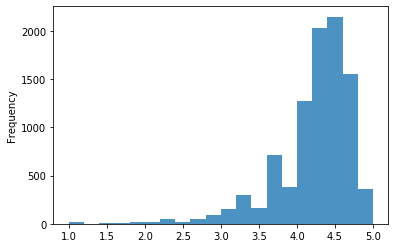

In [205]:
df['Rating'].plot.hist(bins=20, alpha = 0.8)

## 4.1. Average ratings by categories

- High-rated categories are "Events", "Education", "Are and Design", "Books and References" and "Personalization"
- Low-rated categories are "Dating", "Tools", "Maps and Navigation", "Video Players" and "Lifestyle"

In [211]:
print('Average ratings of apps by categories')
df_cat_mean_rating = df.groupby(['Category'])['Rating'].mean()
print(df_cat_mean_rating)
print('-'*40)
print('Top-5 high-rated categories')
print(df_cat_mean_rating.nlargest(5))
print('-'*40)
print('Top-5 low-rated categories')
print(df_cat_mean_rating.nsmallest(5))

Average ratings of apps by categories
Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192272
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.178462
LIFESTYLE              4.087937
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335987
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.